# Classification of NBA all-star players

## INTRODUCTION

Basketball is a sport played throughout the world. In the professional scene, the most highly skilled basketball players play in the National Basketball Association League (NBA) in North America. The most skiled and popular players in the NBA are given the title "All-Star", as voted by fans. Being an All-Star signifies that a player is elite in the most difficult, demanding professional basketball league in the world.
As such, the goal for our project is to answer the following question: Can we predict whether a player will be an all-star based on their points scored per game and total minutes played per game in the regular season?
To answer this question, we will be using two data sets from kaggle. One data set has all the stats of all-star players from 2021 - 2022 during the regular season. The other data set will have all the stats of all players from 2021 - 2022 during the regular season.

In [1]:
# Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 5)
set.seed(69)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## EXPLORATORY DATA ANALYSIS

In [2]:
all_star_data <- read_csv("final_data.csv")
all_star_data

Rows: 1003 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): first, last, team
dbl  (20): year, games_played, fgm, fga, fg3m, fg3a, ftm, fta, oreb, dreb, r...
time  (1): min

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


first,last,team,year,games_played,min,fgm,fga,fg3m,fg3a,⋯,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
<chr>,<chr>,<chr>,<dbl>,<dbl>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Julius,Erving,PHI,1980,82,35:02:00,9.68,18.59,0.05,0.22,⋯,8.01,4.44,2.62,1.73,3.40,2.84,24.56,0.521,0.220,0.787
Eddie,Johnson,ATL,1980,75,35:55:00,7.64,15.16,0.08,0.32,⋯,2.39,5.47,1.54,0.11,2.70,2.53,19.08,0.504,0.249,0.784
Artis,Gilmore,CHI,1980,81,34:31:00,6.67,9.93,0.00,0.00,⋯,10.06,2.15,0.77,2.43,3.31,3.58,17.89,0.672,0.000,0.706
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
De'Aaron,Fox,SAC,2022,73,33:23:00,9.34,18.23,1.63,5.03,⋯,4.19,6.12,1.14,0.32,2.48,2.36,25.01,0.512,0.324,0.780
Jaren,Jackson Jr.,MEM,2022,63,28:24:00,6.60,13.05,1.59,4.48,⋯,6.76,0.95,1.03,3.00,1.70,3.60,18.62,0.506,0.355,0.788


In [3]:
general_player_data <- read.delim("2021-2022 NBA Player Stats - Playoffs.csv", sep = ";")
general_player_data

Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,⋯,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,⋯,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,⋯,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
216,Trae Young,PG,23,ATL,5,5,37.2,4.4,13.8,⋯,0.788,1.0,4.0,5.0,6.0,0.6,0.0,6.2,2.6,15.4
217,Omer Yurtseven,C,23,MIA,9,0,4.2,1.3,2.0,⋯,0.333,0.1,0.7,0.8,0.3,0.0,0.1,0.0,0.2,2.8


In [4]:
general_player_data_summarized <- mutate(general_player_data, total_min_played_for = G * MP) |> 
                                         select(Player, PTS, total_min_played_for)
general_player_data_summarized

Player,PTS,total_min_played_for
<chr>,<dbl>,<dbl>
Precious Achiuwa,10.2,166.8
Steven Adams,3.4,114.1
Bam Adebayo,14.8,613.8
⋮,⋮,⋮
Trae Young,15.4,186.0
Omer Yurtseven,2.8,37.8


In [5]:
all_star_data_summarized <- mutate(all_star_data, total_min_played = games_played * min, 
                                   Player = paste(first, last)) |>
    filter(year > 2020, year < 2022) |>
    select(Player, pts, total_min_played)
all_star_data_summarized

Player,pts,total_min_played
<chr>,<dbl>,<drtn>
Stephen Curry,25.28,8026200 secs
LeBron James,29.89,7231680 secs
Giannis Antetokounmpo,29.88,7943520 secs
⋮,⋮,⋮
Rudy Gobert,15.56,7626960 secs
Zach LaVine,24.41,8461920 secs


In [6]:
filtered_all_stars_players_from_general_data <- subset(general_player_data_summarized, 
                                                       Player %in% all_star_data_summarized$Player) |>
     mutate(all_star = ifelse(PTS > 0, "Yes", "No"))
filtered_all_stars_players_from_general_data

,Player,PTS,total_min_played_for,all_star
,<chr>,<dbl>,<dbl>,<chr>
8,Giannis Antetokounmpo,31.7,447.6,Yes
26,Devin Booker,23.3,366.0,Yes
40,Jimmy Butler,27.4,629.0,Yes
⋮,⋮,⋮,⋮,⋮
209,Andrew Wiggins,16.5,767.8,Yes
216,Trae Young,15.4,186.0,Yes


In [7]:
non_all_star_data <- anti_join(general_player_data_summarized, all_star_data_summarized)|>
filter_if(is.numeric, all_vars((.) != 0)) |>
mutate(all_star = ifelse(PTS > 0, "No", "Yes"))
non_all_star_data

Joining with `by = join_by(Player)`


Player,PTS,total_min_played_for,all_star
<chr>,<dbl>,<dbl>,<chr>
Precious Achiuwa,10.2,166.8,No
Steven Adams,3.4,114.1,No
Bam Adebayo,14.8,613.8,No
⋮,⋮,⋮,⋮
Thaddeus Young,3.3,87.0,No
Omer Yurtseven,2.8,37.8,No


In [8]:
joined_table <- full_join(filtered_all_stars_players_from_general_data, non_all_star_data)
joined_table

Joining with `by = join_by(Player, PTS, total_min_played_for, all_star)`


Player,PTS,total_min_played_for,all_star
<chr>,<dbl>,<dbl>,<chr>
Giannis Antetokounmpo,31.7,447.6,Yes
Devin Booker,23.3,366.0,Yes
Jimmy Butler,27.4,629.0,Yes
⋮,⋮,⋮,⋮
Thaddeus Young,3.3,87.0,No
Omer Yurtseven,2.8,37.8,No


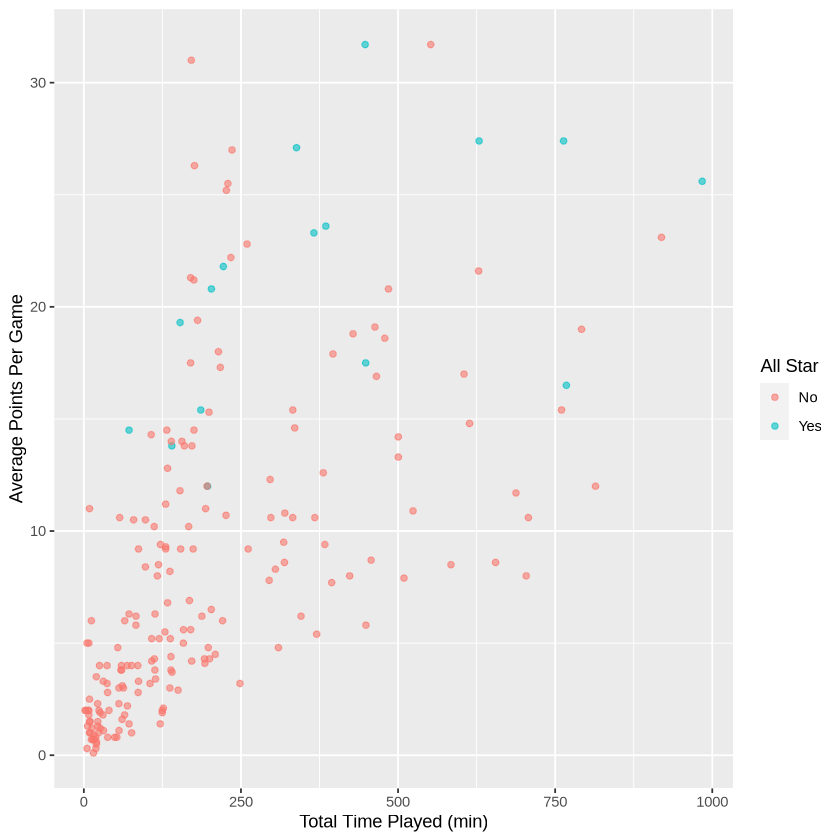

In [9]:
all_star_plot <- joined_table |>
    ggplot(aes(x = total_min_played_for, y = PTS, color = all_star)) +
    geom_point(alpha = 0.6) +
    labs(x = "Total Time Played (min)", y = "Average Points Per Game", color = "All Star")

all_star_plot

## METHOD 

We are using 2 processed datasets from "kaggle.com" called **NBA Player Stats 2021-2022** (includes data for both non-allstar players and all-star players) and **All-STAR Player Stats** (includes only the data for all-star players.

### Datasets

A combination of both general NBA players and NBA ALL-STARS datasets/tables will be used to retrieve individual player stats. The **All-STAR Player Stats** table will be used as a filter metric in order to distinguish between an all-star player and a non-all-star player which is indicated in the new mutated column **all_star**. 

The ***general_player_data*** and ***all_star_data*** data tables are *summarized* to provide filtered years from 2021-2022 and selected for columns: **Player**, **PTS** (points per game) and **total_minutes_played_for**. 

***general_player_data*** is *cleaned* for null (0) values.

The ***general_player_data*** table is filtered out for all-star players into a new table called ***filtered_all_stars_players_from_general_data*** based on Player names in ***all_star_data***. Non-all-star players are filtered out from ***general_player_data*** into a new table called ***non_all_star_data***. Both ***non_all_star_data*** and ***filtered_all_stars_players_from_general_data*** are joined together into a single table.

### Variables

The classification of whether an NBA player will get drafted as an ALL-STAR player has several criterias to be assessed upon. For this project, the variables of **total minutes played for** and **PTS** will be used to evaluate this classification. The variable of **total minutes played for** is derived by mutating the *min* (average minutes) and *games_played* (total games played) column. The variable **PTS** is derived from the *pts* (average points per game) column.

### Visualization

The variables of **PTS** vs **total minutes played for** will be visualized in scatter plot graph as it is expected that the data points for "NBA players" and "NBA ALL-STARS players" will be random. Both types of data points will be made distinctive using color and shape-based distinctions in order to visually evaluate any trends for both categories in terms of "average points per game" and "total minutes played".



## EXPECTED OUTCOMES AND SIGNIFICANCE


### Expected outcomes

The project is likely to find a positive correlation between average points per game and total minutes played for both NBA players and All-Stars, with All-Stars expected to have higher averages in both metrics.

### Impact of findings

Successful prediction of All-Star players based on points per game and total minutes played could revolutionize player evaluation, aiding in scouting, drafting, and player development decisions. It could also streamline talent identification, refine player evaluation metrics, and impact financial decisions related to player salaries.

### Future questions

The project's success could lead to further investigation into additional predictive variables, longitudinal analysis of player performance, comparative studies across NBA eras, and exploration of team dynamics influencing All-Star selection.
